In [4]:
import pandas as pd

In [5]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


### 1. Quest_8월 11일 오후
- DDA 분석 대상: '성별','신장','심혈관질환','체중','흡연여부','직업','혈액형', '연령'
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 dataset 만들기


In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

In [7]:
df_ROS_list= df_ROS[['성별','신장','심혈관질환','체중','흡연여부','직업','혈액형', '연령', '재발여부']]
df_ROS_list[:3]
df_ROS_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   직업      1479 non-null   object 
 6   혈액형     1894 non-null   object 
 7   연령      1894 non-null   int64  
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [8]:
#결측치 확인하기 
df_ROS_list.isnull().sum()
## 결과 직업 결측치 날리기

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
직업       415
혈액형        0
연령         0
재발여부       0
dtype: int64

In [9]:
df_ROS_list_drop=df_ROS_list.dropna()
df_ROS_list_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   직업      1479 non-null   object 
 6   혈액형     1479 non-null   object 
 7   연령      1479 non-null   int64  
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [10]:
df_ROS_list_drop.describe(include=object)
## 직업, 혈액형_범주형

,직업,혈액형
count,1479,1479
unique,17,4
top,사무직,RH+A
freq,449,543


In [11]:
#단일변수 범주형_직업
df_ROS_list_drop['직업'].value_counts()

사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
농업        40
의료직       40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

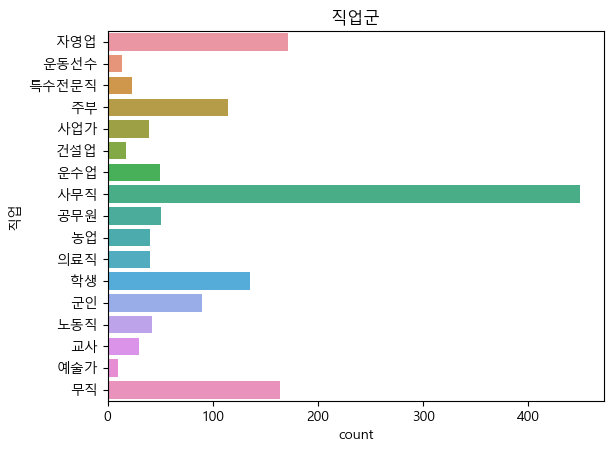

In [12]:
sns.countplot(df_ROS_list_drop, y = '직업')
plt.title('직업군')
plt.show()

In [13]:
# 단일변수 범주형_혈액형
df_ROS_list_drop['혈액형'].value_counts()

RH+A     543
RH+O     416
RH+B     358
RH+AB    162
Name: 혈액형, dtype: int64

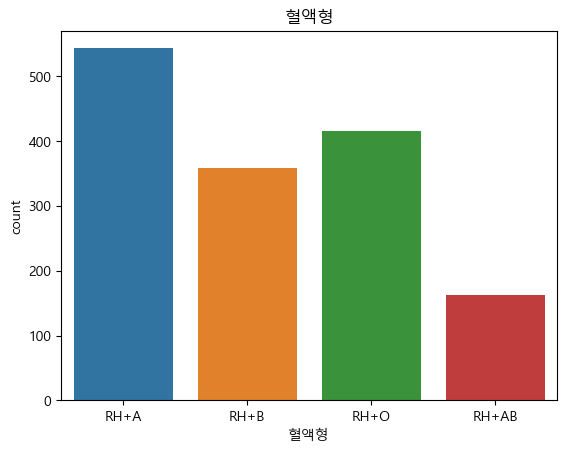

In [14]:
sns.countplot(df_ROS_list_drop, x = '혈액형')
plt.title('혈액형')
plt.show()

In [15]:
df_ROS_list_drop.describe()

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,1.375930,168.158891,0.037863,68.243070,0.212982,39.980392,0.119675
std,0.484526,9.250669,0.190930,11.426661,0.409553,13.314364,0.324691
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,60.000000,0.000000,30.000000,0.000000
50%,1.000000,169.000000,0.000000,67.800000,0.000000,39.000000,0.000000
75%,2.000000,175.000000,0.000000,75.150000,0.000000,47.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


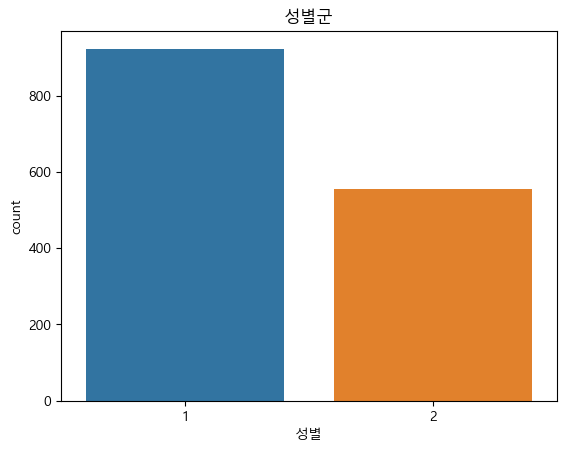

In [16]:
# 성별은 0,1인데 남녀로 보면 countplot 그래프가 더 알맞아보이는?
sns.countplot(df_ROS_list_drop, x= '성별')
plt.title('성별군')
plt.show()

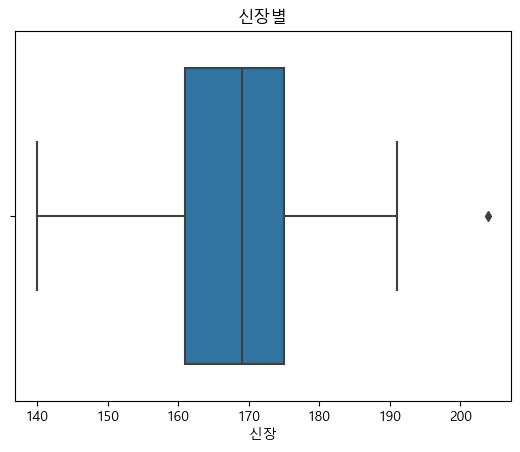

In [17]:
# 신장
sns.boxplot(df_ROS_list_drop, x= '신장')
plt.title('신장별')
plt.show()

여기부터 신장 이상치 제거 시작

In [18]:
df_ROS_list_drop['신장'].describe()

count    1479.000000
mean      168.158891
std         9.250669
min       140.000000
25%       161.000000
50%       169.000000
75%       175.000000
max       204.000000
Name: 신장, dtype: float64

In [19]:
# 신장 
Q1 = df_ROS_list_drop['신장'].describe()['25%']
Q3 = df_ROS_list_drop['신장'].describe()['75%']
IQR = Q3 - Q1

In [20]:
Q1, Q3, IQR

(161.0, 175.0, 14.0)

In [21]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 *IQR
bound_down, bound_up

(140.0, 196.0)

Text(0.5, 1.0, '신장 이상치 제거')

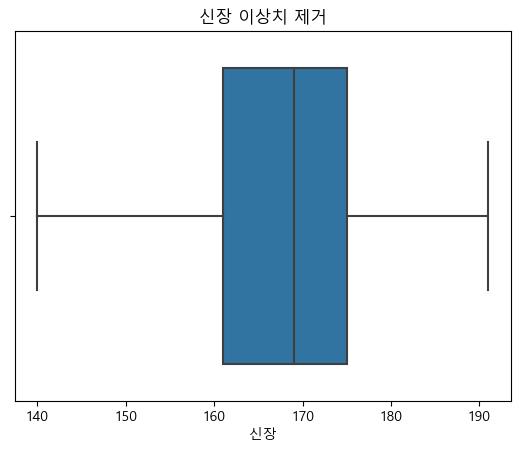

In [22]:
condition = (df_ROS_list_drop['신장']<= bound_up)
df_ROS_drop_length = df_ROS_list_drop[condition]
sns.boxplot(df_ROS_drop_length, x= '신장')
plt.title('신장 이상치 제거')

In [23]:
# 중앙값(169.0) <= 인원수 <= Q3 (175.0)
df_ROS_drop_length['신장'].describe()

count    1478.000000
mean      168.134641
std         9.206655
min       140.000000
25%       161.000000
50%       169.000000
75%       175.000000
max       191.000000
Name: 신장, dtype: float64

In [24]:
df_ROS_drop_length['신장'].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

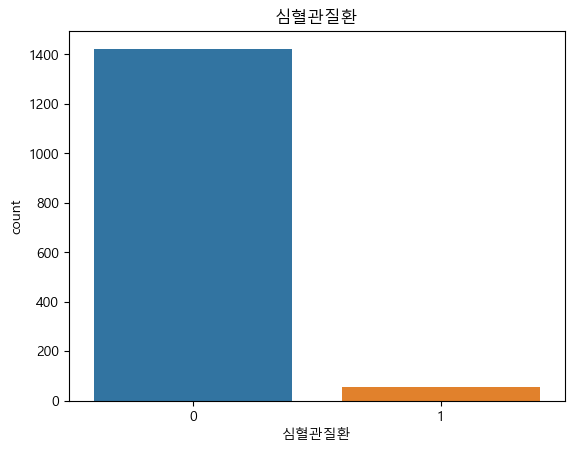

In [25]:
# 심혈관질환 여부에 따라서 있다 없다임. bar로 
sns.countplot(df_ROS_list_drop, x= '심혈관질환')
plt.title('심혈관질환')
plt.show()

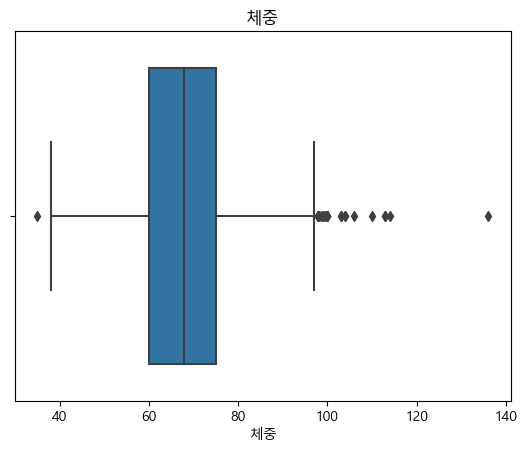

In [26]:
# 체중
sns.boxplot(df_ROS_list_drop, x= '체중')
plt.title('체중')
plt.show()

여기부턴 체중 이상치 제거 시작

In [27]:
df_ROS_list_drop['체중'].describe()

count    1479.000000
mean       68.243070
std        11.426661
min        35.000000
25%        60.000000
50%        67.800000
75%        75.150000
max       136.100000
Name: 체중, dtype: float64

In [28]:
# 체중 bound 구하기
Q1 = df_ROS_list_drop['체중'].describe()['25%']
Q3 = df_ROS_list_drop['체중'].describe()['75%']
IQR = Q3 - Q1

In [29]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 * IQR
bound_up, bound_down

(97.87500000000001, 37.27499999999999)

Text(0.5, 1.0, '체중 이상치 제거')

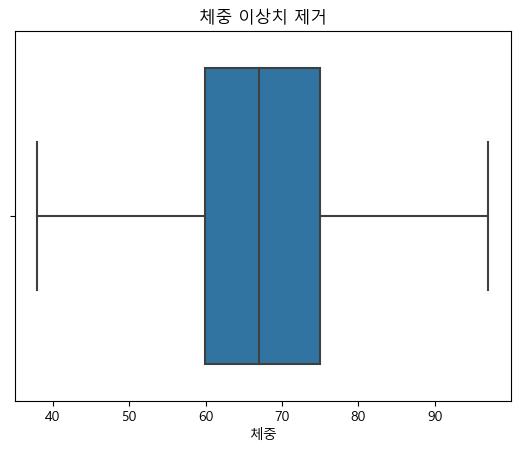

In [30]:
condition = (df_ROS_list_drop['체중'] <= bound_up) & (df_ROS_list_drop['체중']>= bound_down)
df_ROS_drop_weight = df_ROS_list_drop[condition]
sns.boxplot(df_ROS_drop_weight, x = '체중')
plt.title('체중 이상치 제거')

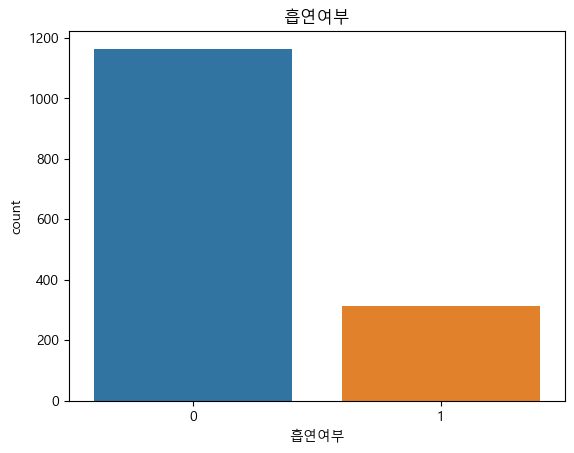

In [31]:
# 흡연여부 0,1 
sns.countplot(df_ROS_list_drop, x = '흡연여부')
plt.title('흡연여부')
plt.show()

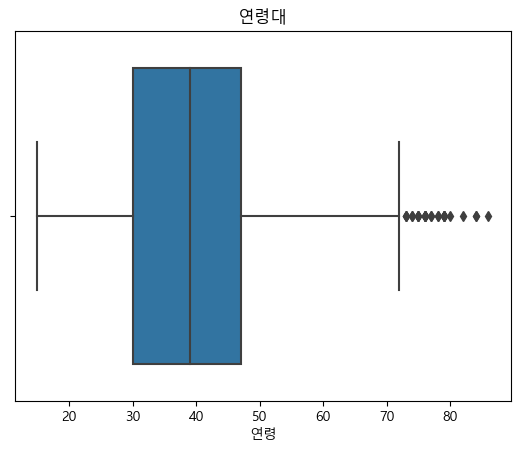

In [32]:
# 연령
sns.boxplot(df_ROS_list_drop, x = '연령')
plt.title('연령대')
plt.show()

연령 이상치 제거 시작

In [33]:
df_ROS_list_drop['연령'].describe()

count    1479.000000
mean       39.980392
std        13.314364
min        15.000000
25%        30.000000
50%        39.000000
75%        47.000000
max        86.000000
Name: 연령, dtype: float64

In [34]:
Q1 = df_ROS_list_drop['연령'].describe()['25%']
Q3 = df_ROS_list_drop['연령'].describe()['75%']
IQR = Q3 - Q1

In [35]:
bound_up = Q3 + 1.5 * IQR
bound_down = Q1 - 1.5 * IQR
bound_down, bound_up

(4.5, 72.5)

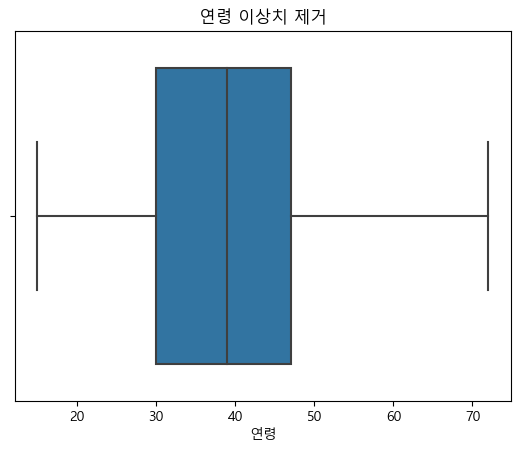

In [36]:
condition = (df_ROS_list_drop['연령'] <= bound_up)
df_ROS_drop_age = df_ROS_list_drop[condition]
sns.boxplot(df_ROS_drop_age, x='연령')
plt.title('연령 이상치 제거')
plt.show()

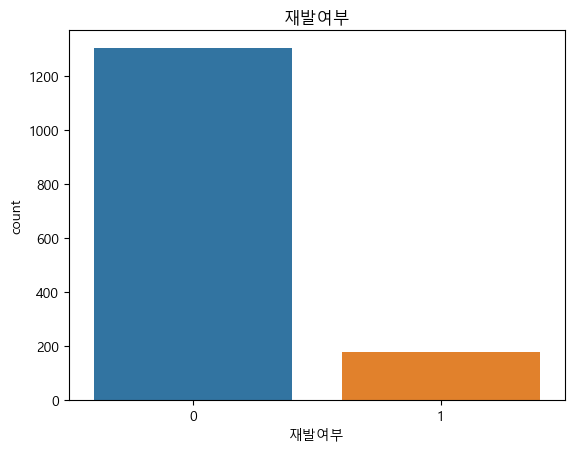

In [37]:
# 재발여부
sns.countplot(df_ROS_list_drop, x = '재발여부')
plt.title('재발여부')
plt.show()

### Quest_2
- apply 이용
- 대상 column 연령
- 조건: 중앙값 - 개인연령 = 각 cell에 붙이기 = '연령 차이(중앙값기준)' 

In [38]:
df_ROS_list_drop

,성별,신장,심혈관질환,체중,흡연여부,직업,혈액형,연령,재발여부
0,2,163,0,60.3,0,자영업,RH+A,66,0
1,1,171,0,71.7,0,운동선수,RH+A,47,0
2,1,178,0,77.1,0,특수전문직,RH+B,39,0
3,1,174,0,74.2,0,주부,RH+O,40,0
4,1,183,0,80.7,0,특수전문직,RH+A,42,0
...,...,...,...,...,...,...,...,...,...
1889,2,157,0,64.0,0,무직,RH+A,59,0
1890,2,157,0,59.0,0,사무직,RH+B,42,0
1891,1,167,0,70.0,0,무직,RH+O,61,0
1892,1,177,0,77.0,0,사무직,RH+A,29,0


In [39]:
df_ROS_list_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   직업      1479 non-null   object 
 6   혈액형     1479 non-null   object 
 7   연령      1479 non-null   int64  
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


<Axes: xlabel='연령', ylabel='Count'>

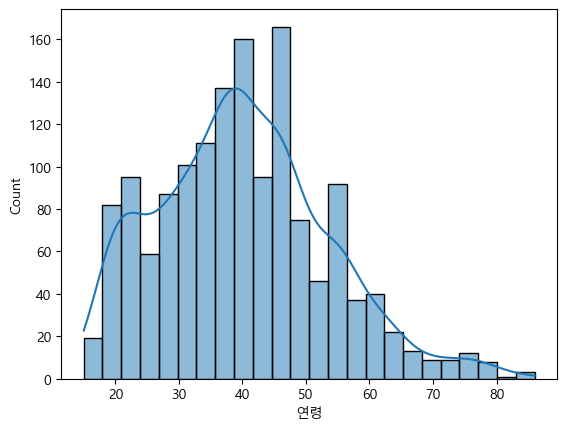

In [41]:
sns.histplot(df_ROS_list_drop, x ='연령', kde=True)

In [45]:
median = df_ROS_list_drop['연령'].median()
median

39.0

In [50]:
def age_subtraction(cell_value) :
    result = cell_value - median # median-개인연령
    return result

In [51]:
age_subtraction(90)

51.0

In [52]:
df_ROS_list_drop['연령'].apply(age_subtraction)

0       27.0
1        8.0
2        0.0
3        1.0
4        3.0
        ... 
1889    20.0
1890     3.0
1891    22.0
1892   -10.0
1893    -9.0
Name: 연령, Length: 1479, dtype: float64

#### drop 된 표에선 새로운 column이 붙여지지 않음.. 왜죠??

In [53]:
df_ROS_list_drop['연령차이(중앙값기준)'] = df_ROS_list_drop['연령'].apply(age_subtraction)

C:\Users\01-15\AppData\Local\Temp\ipykernel_9340\4152643073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_list_drop['연령차이(중앙값기준)'] = df_ROS_list_drop['연령'].apply(age_subtraction)


In [64]:
median = df_ROS['연령'].median()
median

41.0

In [56]:
def all_subtraction(cell_value) :
    result = cell_value - median # median-개인연령
    return result

In [65]:
df_ROS['연령'].apply(all_subtraction)

0       25.0
1        6.0
2       -2.0
3       -1.0
4        1.0
        ... 
1889    18.0
1890     1.0
1891    20.0
1892   -12.0
1893   -11.0
Name: 연령, Length: 1894, dtype: float64

In [66]:
df_ROS['연령차이(중앙값기준)']=df_ROS['연령'].apply(all_subtraction)

In [67]:
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령차이(중앙값기준)
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0,25.0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0,6.0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0,-2.0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0,-1.0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0,18.0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0,1.0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0,20.0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0,-12.0
